# Chapter 19: Social Network Analytics


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - matplotlib: 3.2.0
>   - networkx: 2.4
>   - pandas: 1.0.1
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [1]:
# import required packages for this chapter
from pathlib import Path

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

# Problem 19.1:  Describing a Network
Consider an undirected network for individuals A, B, C, D, and E.  A is connected to B and C.  B is connected to A and C.  C is connected to A, B, and D.  D is connected to C and E.  E is connected to D.  

## Solution 19.1.a 
Produce a network plot for this network.

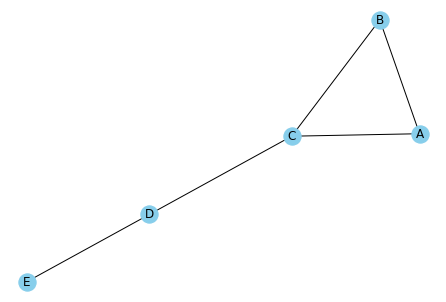

In [3]:
df = pd.DataFrame([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E')], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')

nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()

## Solution 19.1.b 
What node(s) would need to be removed from the network for the remaining nodes to constitute a clique?

Nodes D and E would need to be removed from the graph for the remaining nodes to constitute a clique.

## Solution 19.1.c
What is the degree for node A?

In [4]:
G.degree()

DegreeView({'A': 2, 'B': 2, 'C': 3, 'D': 2, 'E': 1})

The degree for node A is 2


## Solution 19.1.d
Which node(s) have the lowest degree?

Node E has lowest degree, i.e. 1.

## Solution 19.1.e
Tabulate the degree distribution for this network.

In [5]:
pd.DataFrame(G.degree())

,0,1
0,A,2
1,B,2
2,C,3
3,D,2
4,E,1


## Solution 19.1.e
Is this network connected?

The network is connected as a path can be found between any pair of nodes.

## Solution 19.1.e
Calculate the betweenness centrality for nodes A and C.

In [6]:
print('Betweenness', nx.betweenness_centrality(G))

Betweenness {'A': 0.0, 'B': 0.0, 'C': 0.6666666666666666, 'D': 0.5, 'E': 0.0}


The betweenness centrality for node A is 0. None of the shortest paths between the other nodes passes through A.

For node C, the unnormalized betweenness is 4. The number of all possible shortest paths is 4*3/2 = 6 and therefore the betweenness is 0.66.

## Solution 19.1.e
Calculate the density of the network.

In [7]:
print('Density', nx.density(G))

Density 0.5


# Problem 19.2: Network Density and Size
Imagine that two new nodes are added to the undirected network in the previous exercise.

## Solution 19.2.a
By what percent has the number of nodes increased? 

If we add two new nodes the total nodes in the network will be 7. The number of
nodes in the original network is 5. To calculate % increase in nodes, first 
calculate the difference between the two numbers, i.e. 7 - 5 = 2, which  
is the "increase". Then divide the increase by the original number of nodes
and multiply the answer by 100:

In [8]:
print('% increase in number of nodes = 2/5 * 100 = ', 2 / 5 * 100)

% increase in number of nodes = 2/5 * 100 =  40.0


## Solution 19.2.b
By what percent has the number of possible edges increased? 

For an undirected network, the number of maximum edges is given by

n(n-1)/2

where n is the number of nodes in the network.

Let's calculate maximum number of edges in each of old and new network:

Number of maximum edges in the old network with 5 nodes 
```
 = 5 (5-1) / 2 
 = 20 / 2 
 = 10
```

Number of maximum edges in the new network with 7 nodes 
```
 = 7 (7-1) / 2 
 = 42 / 2 
 = 21
```

Therefore, the percent increase in the number of maximum edges after adding two new nodes is 
```
 = ((21 - 10) / 10) * 100
 = (11/10) * 100
 = 110
```

## Solution 19.2.c
Suppose the new node has a typical (median) number of connections.  What will happen to network density?

If the new node has typical number of connections, the density of the network will be reduced.

Consider our old and new networks for the illustration. The typical (median) 
number of connections for each node in the old network is 2. Suppose our new 
network is resulted from the addition of two new nodes (each with number of 
connections 2) in the old network. So new network will have 9 edges and 7 
nodes. As calculated above, the density of the old network = 0.5. Let's 
calculate density of our new network

Density of new network with 7 nodes and 9 edges
```
 = 9/(7(7-1)/2) = 9 / 21 = 0.43.
```


## Solution 19.2.d
Comment on comparing densities in networks of different sizes.

As you add nodes to a network, in order to maintain the same density of the network
the new nodes must have MORE than the typical number of connections of the existing
network nodes.  Therefore, in two networks with the same density, one large and one
small, the nodes in the larger network will be more connected than those in the 
smaller.

## Solution 19.2.e
Tabulate the degree distribution for this network.

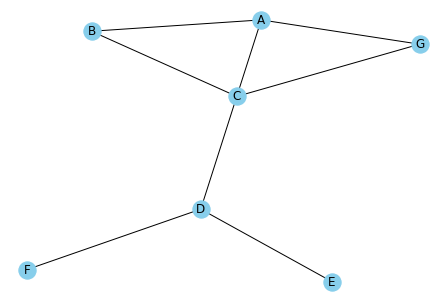

In [9]:
df = pd.DataFrame([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E'), 
                   ('A', 'G'), ('C', 'G'), ('D', 'F')], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')

nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()

In [10]:
pd.DataFrame(G.degree())

,0,1
0,A,3
1,B,2
2,C,4
3,D,3
4,E,1
5,G,2
6,F,1


# Problem 19.3: Link Prediction
Consider the network shown in Figure 19.10.



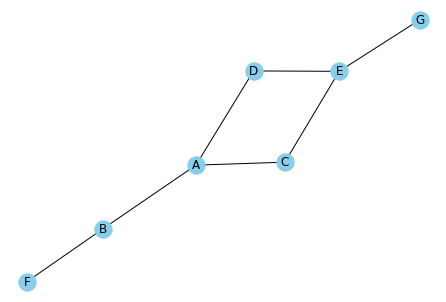

In [11]:
df = pd.DataFrame([("A", "C"), ("A", "D"), ("A", "B"), ("B", "F"), ("C", "E"), ("D", "E"), ("E", "G")], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')

nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()

## Solution 19.3.a
Using the number of common neighbors score, predict the next link to form (that is, suggest which new link has the best chance of success).

The next link to form is either between C and D or A and E since each of them has two common neighbors.

## Solution 19.3.b
Using the shortest path score, identify the link that is least likely to form.

The least likely link to form is between F and G since the shortest path score
is 5 which is the largest in the network.